In [16]:
import random
from math import floor 
import numpy as np
import matplotlib.pyplot as plt
import mesa 
import networkx as nx

In [17]:
class KnowledgeAgent(mesa.Agent):
    """
    Multi-Agent Knowledge Voting simulation
    """

    def __init__(self, id, model, knowledge_state):
        """
        Create a new Knowledge agent.
        
        Knowledge_state is an list of propositions that are either true (1) or false (0).
        
        """
        
        super().__init__(id, model)
        self.knowledge_state = knowledge_state

    def step(self):
   
   
        print(f"This individual at {self.pos} has this knowledge: {self.knowledge_state}")
   
        """Broadcast beliefs"""
        for i, state in enumerate(self.knowledge_state):
            if state == 1:
                pass
                neighbor_locations = self.model.grid.get_neighborhood(
                    self.pos,

                    include_center = False
                )
                
                neighbors = self.model.agents.select(lambda x: x.pos in neighbor_locations)
                
                for neighbor in neighbors:
                    # print(neighbor.knowledge_state, len(neighbors))
                    neighbor.knowledge_state[i] = 1
                
                # for neighbor in neighbors:
        
        
        # for i in range(len(self.knowledge_state)):
            
        #     if (self.knowledge_state[i] == 1):
        #         k = self.knowledge_state
        #         self.knowledge_state = k[:i] + (0,) + k[i+1:]
        #         break


class KnowledgeModel(mesa.Model):
    """
    Model class for the Knowledge segregation model.
    """

    def __init__(self, N):
        super().__init__()
        
        self.N = N
        
        G = nx.Graph()
        G.add_node(1)
        G.add_node(2)
        G.add_node(3)
        G.add_edge(1,2)
        G.add_edge(2,3)
        self.grid = mesa.space.NetworkGrid(G)
        nx.draw(G, with_labels=True, font_weight='bold')

        self.schedule = mesa.time.RandomActivation(self)

        self.datacollector = mesa.DataCollector(
            agent_reporters={"knowledge_state": "knowledge_state"},
            model_reporters={"totalKnowledge": "totalKnowledge"}
        )
        
        for i in range(N):
            if (i == 0):
                agent = KnowledgeAgent(i, self, list((1,0,0)))
            else:
                agent = KnowledgeAgent(i, self, list((0,0,0)))
            self.schedule.add(agent)
            self.grid.place_agent(agent, i+1)
        
        self.running = True
        
        self.totalKnowledge = self.getTotalKnowledge()
        
        self.datacollector.collect(self)

    def step(self):
        """
        Run one step of the model.
        """

        # collect data
        
        self.datacollector.collect(self)
        self.schedule.step()
        self.totalKnowledge = self.getTotalKnowledge()
        
        
    def getTotalKnowledge(self):
        totalKnowledge = 0
        
        for agent in self.agents:
            for proposition in agent.knowledge_state:
                if (proposition == 1):
                    totalKnowledge = totalKnowledge + 1
                    
        # print(totalKnowledge)
        
        return totalKnowledge


This individual at 1 has this knowledge: [0, 0, 0]
This individual at 2 has this knowledge: [1, 0, 0]
This individual at 3 has this knowledge: [1, 0, 0]
This individual at 1 has this knowledge: [1, 0, 0]
This individual at 2 has this knowledge: [1, 0, 0]
This individual at 3 has this knowledge: [1, 0, 0]
This individual at 1 has this knowledge: [1, 0, 0]
This individual at 2 has this knowledge: [1, 0, 0]
This individual at 3 has this knowledge: [1, 0, 0]
This individual at 1 has this knowledge: [1, 0, 0]
This individual at 2 has this knowledge: [1, 0, 0]
This individual at 3 has this knowledge: [1, 0, 0]


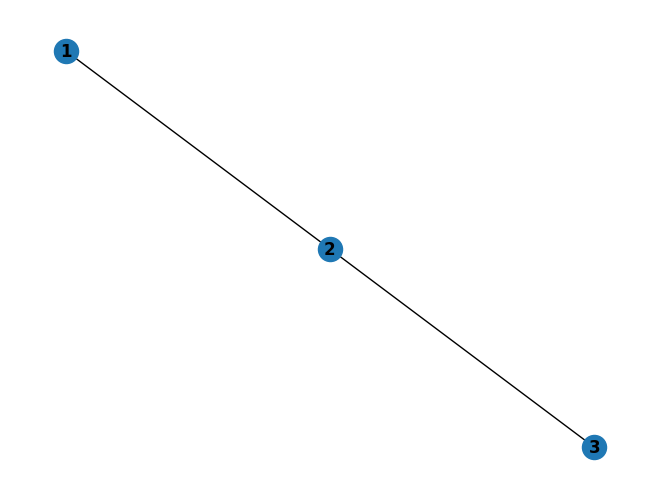

In [18]:
testmodel = KnowledgeModel(3)

T = 4

for i in range(T):
    testmodel.step()



<Axes: >

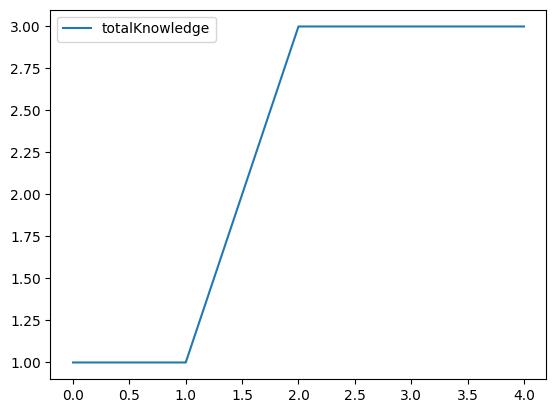

In [19]:
dataM = testmodel.datacollector.get_model_vars_dataframe()
dataM.plot()

In [20]:
dataA = testmodel.datacollector.get_agent_vars_dataframe()
dataA

knowledge_state
Step AgentID                
0    0             [1, 0, 0]
     1             [1, 0, 0]
     2             [1, 0, 0]
1    0             [1, 0, 0]
     1             [1, 0, 0]
     2             [1, 0, 0]
2    0             [1, 0, 0]
     1             [1, 0, 0]
     2             [1, 0, 0]
3    0             [1, 0, 0]
     1             [1, 0, 0]
     2             [1, 0, 0]